In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/twitter-bots-accounts/twitter_human_bots_dataset.csv


# Set up the environment

In [2]:
# Prepare your file
parent_dir: str = os.path.join('/kaggle', 'input', 'twitter-bots-accounts')
dataset_name: str = "twitter_human_bots_dataset.csv"
dataset_path: str = os.path.join(parent_dir, dataset_name)
print(f"Dataset directory: {dataset_path}")

Dataset directory: /kaggle/input/twitter-bots-accounts/twitter_human_bots_dataset.csv


# Read and prepare the data

In [3]:
# Generate a Pandas DataFrame
twitter_accounts_df: pd.DataFrame = pd.read_csv(dataset_path, index_col=0)
print(f"Dataset shape {twitter_accounts_df.shape}")

Dataset shape (37438, 19)


In [4]:
# Take a look to the Data
print(f"Dataset columns: {twitter_accounts_df.columns}")
twitter_accounts_df.head()

Dataset columns: Index(['created_at', 'default_profile', 'default_profile_image', 'description',
       'favourites_count', 'followers_count', 'friends_count', 'geo_enabled',
       'id', 'lang', 'location', 'profile_background_image_url',
       'profile_image_url', 'screen_name', 'statuses_count', 'verified',
       'average_tweets_per_day', 'account_age_days', 'account_type'],
      dtype='object')


,created_at,default_profile,default_profile_image,description,favourites_count,followers_count,friends_count,geo_enabled,id,lang,location,profile_background_image_url,profile_image_url,screen_name,statuses_count,verified,average_tweets_per_day,account_age_days,account_type
0,2016-10-15 21:32:11,False,False,"Blame @xaiax, Inspired by @MakingInvisible, us...",4,1589,4,False,787405734442958848,en,unknown,http://abs.twimg.com/images/themes/theme1/bg.png,http://pbs.twimg.com/profile_images/7874121826...,best_in_dumbest,11041,False,7.870,1403,bot
1,2016-11-09 05:01:30,False,False,Photographing the American West since 1980. I ...,536,860,880,False,796216118331310080,en,Estados Unidos,http://abs.twimg.com/images/themes/theme1/bg.png,http://pbs.twimg.com/profile_images/8023296328...,CJRubinPhoto,252,False,0.183,1379,human
2,2017-06-17 05:34:27,False,False,Scruffy looking nerf herder and @twitch broadc...,3307,172,594,True,875949740503859204,en,"Los Angeles, CA",http://abs.twimg.com/images/themes/theme1/bg.png,http://pbs.twimg.com/profile_images/1278890453...,SVGEGENT,1001,False,0.864,1159,human
3,2016-07-21 13:32:25,True,False,Wife.Godmother.Friend.Feline Fanatic! Assistan...,8433,517,633,True,756119643622735875,en,"Birmingham, AL",NaN,http://pbs.twimg.com/profile_images/1284884924...,TinkerVHELPK5,1324,False,0.889,1489,human
4,2012-01-15 16:32:35,False,False,Loan coach at @mancity & Aspiring DJ,88,753678,116,True,464781334,en,"England, United Kingdom",http://abs.twimg.com/images/themes/theme1/bg.png,http://pbs.twimg.com/profile_images/9952566258...,JoleonLescott,4202,True,1.339,3138,human


In [5]:
# Functions to preprocess the DataFrame
def convert_bool_to_int(data: pd.DataFrame, boolean_cols: list):
    try:
        for col in boolean_cols:
            data[col] = data[col].astype(int)
    except Exception as e:
        print(e)
    return data

def popularity_metric(friends_count: int, followers_count: int):
    return np.round(np.log(1+friends_count) * np.log(1+followers_count), 3)


def compute_popularity_metric(row):
    return popularity_metric(friends_count=row["friends_count"],
                             followers_count=row["followers_count"])

In [6]:
# Preprocess boolean columns
boolean_cols: list = ["default_profile", "default_profile_image",
                      "geo_enabled", "verified"]
twitter_accounts_df = convert_bool_to_int(data=twitter_accounts_df, boolean_cols=boolean_cols)
twitter_accounts_df.head()

,created_at,default_profile,default_profile_image,description,favourites_count,followers_count,friends_count,geo_enabled,id,lang,location,profile_background_image_url,profile_image_url,screen_name,statuses_count,verified,average_tweets_per_day,account_age_days,account_type
0,2016-10-15 21:32:11,0,0,"Blame @xaiax, Inspired by @MakingInvisible, us...",4,1589,4,0,787405734442958848,en,unknown,http://abs.twimg.com/images/themes/theme1/bg.png,http://pbs.twimg.com/profile_images/7874121826...,best_in_dumbest,11041,0,7.870,1403,bot
1,2016-11-09 05:01:30,0,0,Photographing the American West since 1980. I ...,536,860,880,0,796216118331310080,en,Estados Unidos,http://abs.twimg.com/images/themes/theme1/bg.png,http://pbs.twimg.com/profile_images/8023296328...,CJRubinPhoto,252,0,0.183,1379,human
2,2017-06-17 05:34:27,0,0,Scruffy looking nerf herder and @twitch broadc...,3307,172,594,1,875949740503859204,en,"Los Angeles, CA",http://abs.twimg.com/images/themes/theme1/bg.png,http://pbs.twimg.com/profile_images/1278890453...,SVGEGENT,1001,0,0.864,1159,human
3,2016-07-21 13:32:25,1,0,Wife.Godmother.Friend.Feline Fanatic! Assistan...,8433,517,633,1,756119643622735875,en,"Birmingham, AL",NaN,http://pbs.twimg.com/profile_images/1284884924...,TinkerVHELPK5,1324,0,0.889,1489,human
4,2012-01-15 16:32:35,0,0,Loan coach at @mancity & Aspiring DJ,88,753678,116,1,464781334,en,"England, United Kingdom",http://abs.twimg.com/images/themes/theme1/bg.png,http://pbs.twimg.com/profile_images/9952566258...,JoleonLescott,4202,1,1.339,3138,human


In [7]:
# Create a custom metric to measure the popularity of an input account
twitter_accounts_df["popularity"] = twitter_accounts_df.apply(compute_popularity_metric, axis=1)

# Let's show some examples of such value
twitter_accounts_df[['popularity']]

,popularity
0,11.864
1,45.827
2,32.922
3,40.325
4,64.445
...,...
37433,34.634
37434,89.249
37435,59.654
37436,25.255


# EDA

In [8]:
import matplotlib as mpl
import seaborn as sns
from matplotlib import pyplot as plt
from collections import OrderedDict

mpl.rcParams['font.family'] = 'sans-serif'
mpl.rcParams['figure.figsize'] = 12, 8
mpl.rcParams['font.sans-serif'] = ['Tahoma']
sns.set(font_scale=1.5)
sns.set_style("whitegrid")

In [9]:
# Set up some parameters for EDA
palette: str = "husl"
grouped: str = "account_type"
default_value: str = "unknown"

In [10]:
def get_labels_colors_from_pandas_column(df: pd.DataFrame, column: str, palette: str):
    data_labels: dict = dict()
    try:
        labels: list = df[column].unique().tolist()
        colors: list = sns.color_palette(palette, len(labels))
        data_labels: dict = dict(zip(labels, colors))
    except Exception as e:
        logger.error(e)
    return data_labels

# Retrieve labels and additional parameters to plot figures
data_labels: dict = get_labels_colors_from_pandas_column(
    df=twitter_accounts_df, column=grouped, palette=palette)


In [11]:
# Show labels
print(f"Unique Target values: {data_labels.keys()}")

Unique Target values: dict_keys(['bot', 'human'])


In [12]:
# Functions to plot data distributions
def plot_multiple_histograms(data: pd.DataFrame,
                             grouped_col: str,
                             target_col: str,
                             data_labels: dict):
    # Plot
    plt.figure(figsize=(12, 10))
    title = "\n"
    labels: list = list(data_labels.keys())
    for j, i in enumerate(labels):
        x = data.loc[data[grouped_col] == i, target_col]
        mu_x = round(float(np.mean(x)), 3)
        sigma_x = round(float(np.std(x)), 3)
        ax = sns.distplot(x, color=data_labels.get(i), label=i, hist_kws=dict(alpha=.1),
                          kde_kws={'linewidth': 2})
        ax.axvline(mu_x, color=data_labels.get(i), linestyle='--')
        ax.set(xlabel=f"{target_col.title()}", ylabel='Density')
        title += f"Parameters {str(i)}: $G(\mu=$ {mu_x}, $\sigma=$ {sigma_x} \n"
        ax.set_title(title)
    plt.legend(title="Account Type")
    plt.grid()
    plt.tight_layout()
    plt.show()


def plot_multiple_boxplots(data: pd.DataFrame, grouped_col: str, target_col: str,
                           palette: str = "husl"):
    plt.figure(figsize=(12, 10))

    means: dict = data.groupby([grouped_col])[target_col].mean().to_dict(OrderedDict)
    counter: int = 0

    bp = sns.boxplot(x=grouped_col, y=target_col, data=data, palette=palette, order=list(means.keys()))
    bp.set(xlabel='', ylabel=f"{target_col.title()}")
    ax = bp.axes

    for k, v in means.items():
        # every 4th line at the interval of 6 is median line
        # 0 -> p25 1 -> p75 2 -> lower whisker 3 -> upper whisker 4 -> p50 5 -> upper extreme value
        mean = round(v, 2)
        ax.text(
            counter,
            mean,
            f'{mean}',
            ha='center',
            va='center',
            fontweight='bold',
            size=10,
            color='white',
            bbox=dict(facecolor='#445A64'))
        counter += 1
    bp.figure.tight_layout()
    plt.grid()
    plt.show()

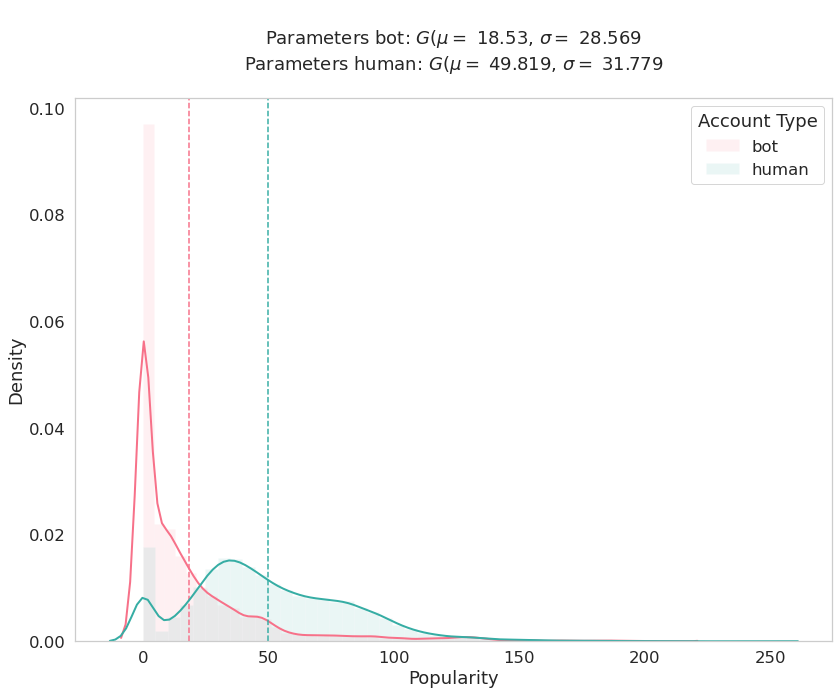

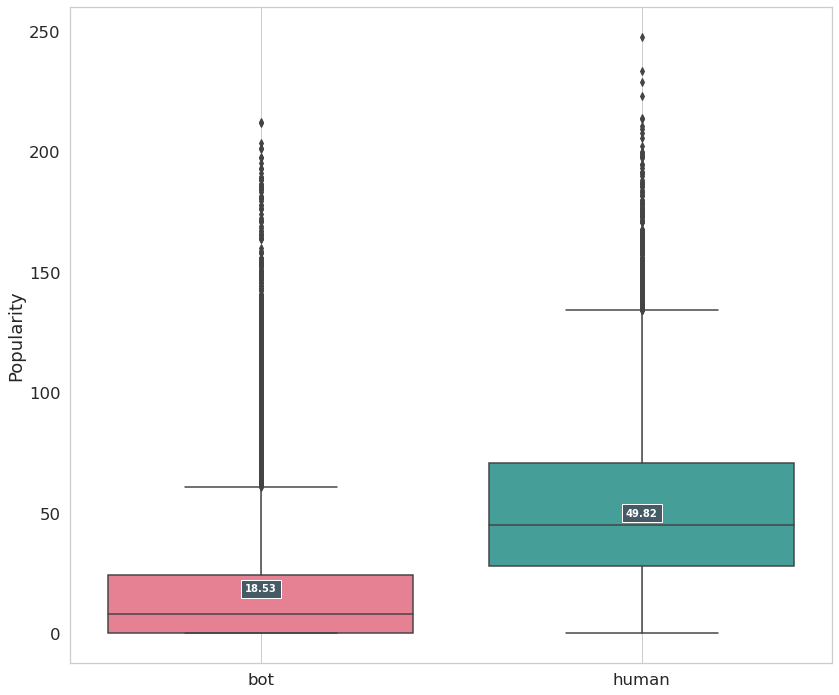

In [13]:
target: str = "popularity"  
# Extract histograms
plot_multiple_histograms(data=twitter_accounts_df, 
                         grouped_col=grouped,
                         data_labels=data_labels,
                         target_col=target)
# Extract Box-plots
plot_multiple_boxplots(data=twitter_accounts_df,
                       grouped_col=grouped,
                       target_col=target,
                       palette=palette)


Let's analyse the average tweets per day

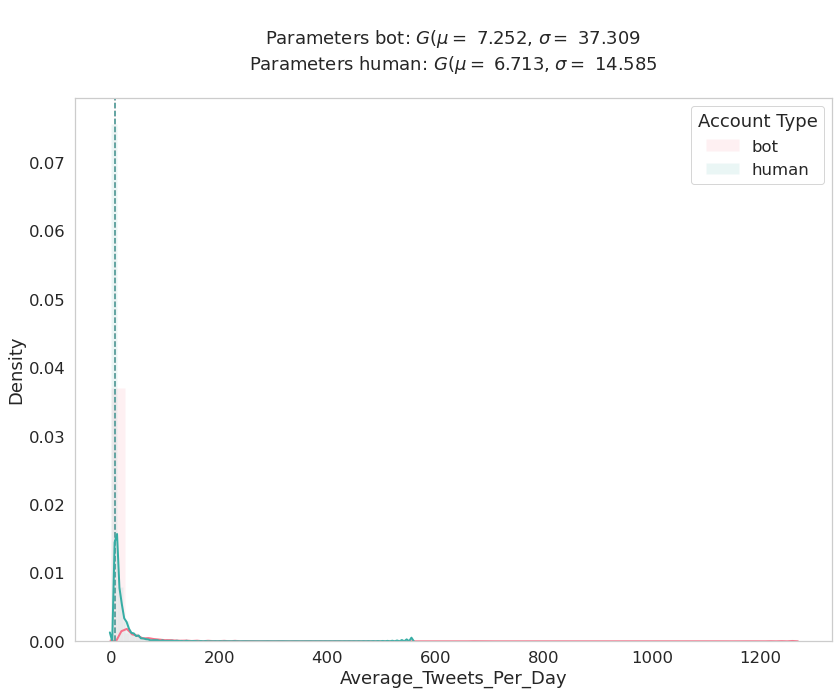

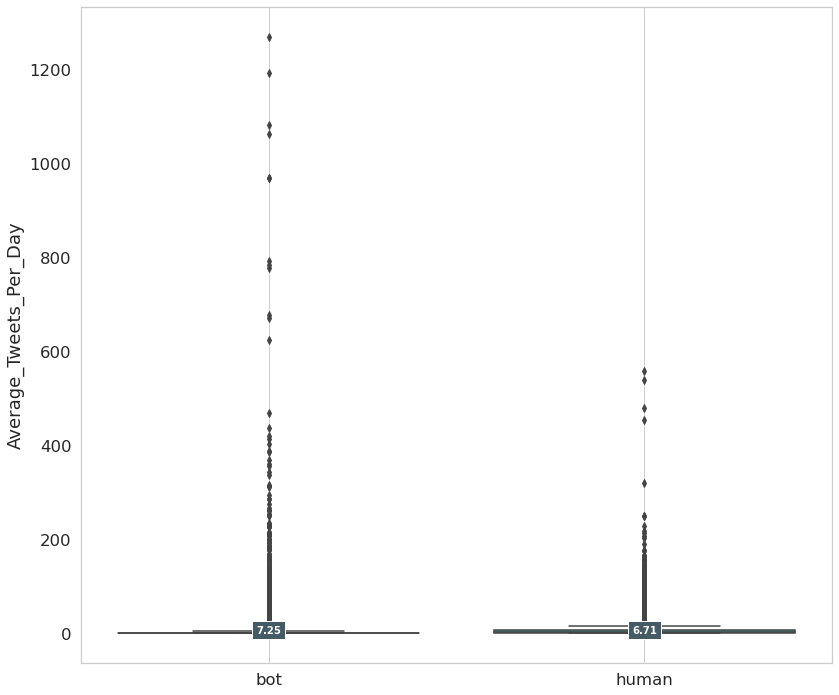

In [14]:
target: str = "average_tweets_per_day"  
# Extract histograms
plot_multiple_histograms(data=twitter_accounts_df, 
                         grouped_col=grouped,
                         data_labels=data_labels,
                         target_col=target)
# Extract Box-plots
plot_multiple_boxplots(data=twitter_accounts_df,
                       grouped_col=grouped,
                       target_col=target,
                       palette=palette)

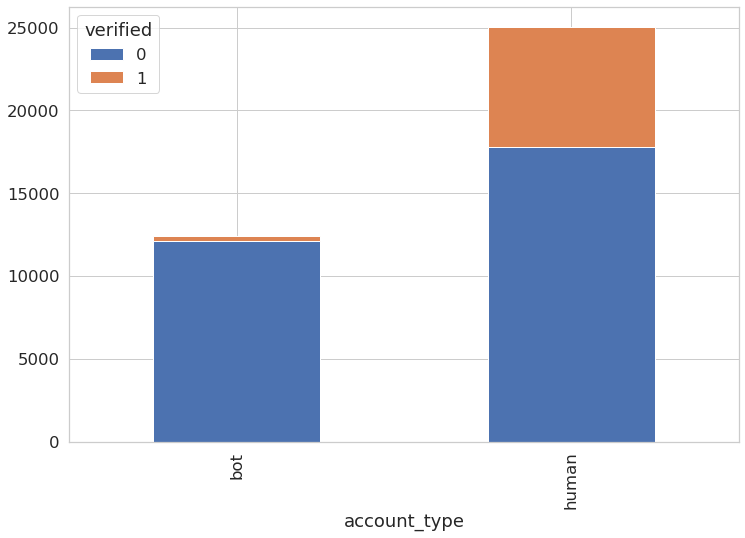

In [15]:
target_col: str = "verified"
twitter_accounts_df2 = twitter_accounts_df.groupby([grouped, target_col])[grouped].count().unstack(target_col)
twitter_accounts_df2.plot(kind='bar', stacked=True)

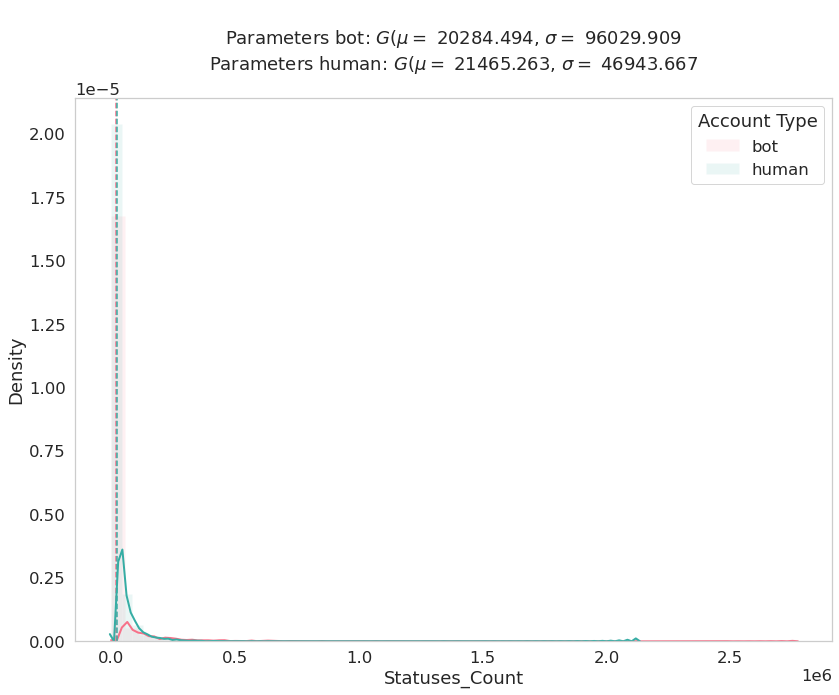

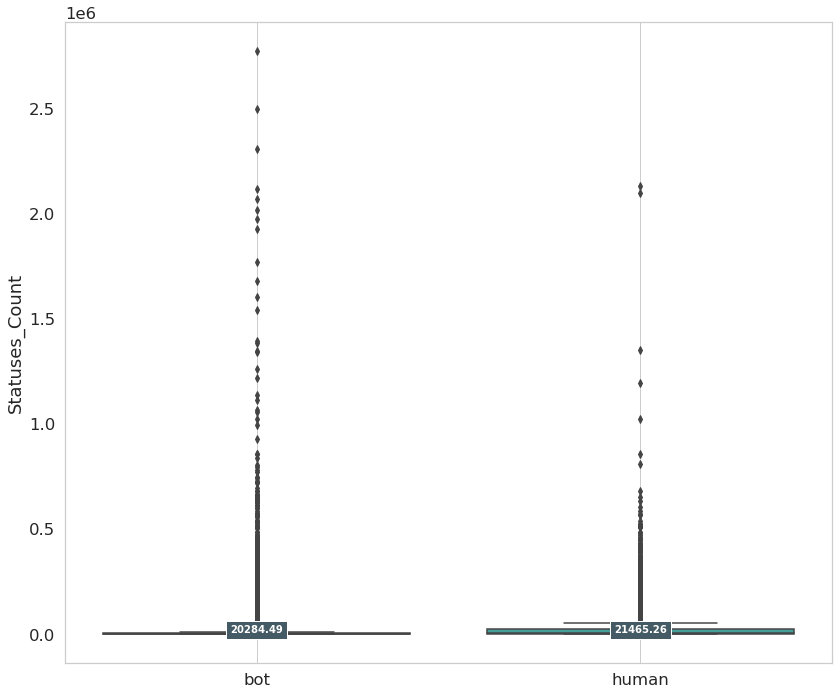

In [16]:
target: str = "statuses_count"  
# Extract histograms
plot_multiple_histograms(data=twitter_accounts_df, 
                         grouped_col=grouped,
                         data_labels=data_labels,
                         target_col=target)
# Extract Box-plots
plot_multiple_boxplots(data=twitter_accounts_df,
                       grouped_col=grouped,
                       target_col=target,
                       palette=palette)

In [17]:
# Preprocess Response variable (account type)
twitter_accounts_df[grouped] = twitter_accounts_df[grouped].astype('category')
twitter_accounts_df.dtypes

created_at                        object
default_profile                    int64
default_profile_image              int64
description                       object
favourites_count                   int64
followers_count                    int64
friends_count                      int64
geo_enabled                        int64
id                                 int64
lang                              object
location                          object
profile_background_image_url      object
profile_image_url                 object
screen_name                       object
statuses_count                     int64
verified                           int64
average_tweets_per_day           float64
account_age_days                   int64
account_type                    category
popularity                       float64
dtype: object

In [18]:
twitter_accounts_df[grouped] = twitter_accounts_df[grouped].cat.codes
twitter_accounts_df.head()


,created_at,default_profile,default_profile_image,description,favourites_count,followers_count,friends_count,geo_enabled,id,lang,location,profile_background_image_url,profile_image_url,screen_name,statuses_count,verified,average_tweets_per_day,account_age_days,account_type,popularity
0,2016-10-15 21:32:11,0,0,"Blame @xaiax, Inspired by @MakingInvisible, us...",4,1589,4,0,787405734442958848,en,unknown,http://abs.twimg.com/images/themes/theme1/bg.png,http://pbs.twimg.com/profile_images/7874121826...,best_in_dumbest,11041,0,7.870,1403,0,11.864
1,2016-11-09 05:01:30,0,0,Photographing the American West since 1980. I ...,536,860,880,0,796216118331310080,en,Estados Unidos,http://abs.twimg.com/images/themes/theme1/bg.png,http://pbs.twimg.com/profile_images/8023296328...,CJRubinPhoto,252,0,0.183,1379,1,45.827
2,2017-06-17 05:34:27,0,0,Scruffy looking nerf herder and @twitch broadc...,3307,172,594,1,875949740503859204,en,"Los Angeles, CA",http://abs.twimg.com/images/themes/theme1/bg.png,http://pbs.twimg.com/profile_images/1278890453...,SVGEGENT,1001,0,0.864,1159,1,32.922
3,2016-07-21 13:32:25,1,0,Wife.Godmother.Friend.Feline Fanatic! Assistan...,8433,517,633,1,756119643622735875,en,"Birmingham, AL",NaN,http://pbs.twimg.com/profile_images/1284884924...,TinkerVHELPK5,1324,0,0.889,1489,1,40.325
4,2012-01-15 16:32:35,0,0,Loan coach at @mancity & Aspiring DJ,88,753678,116,1,464781334,en,"England, United Kingdom",http://abs.twimg.com/images/themes/theme1/bg.png,http://pbs.twimg.com/profile_images/9952566258...,JoleonLescott,4202,1,1.339,3138,1,64.445


In [19]:
twitter_accounts_df_num: pd.DataFrame = twitter_accounts_df.copy()
twitter_accounts_df_num: pd.DataFrame = twitter_accounts_df_num._get_numeric_data()
twitter_accounts_df_num.head()


,default_profile,default_profile_image,favourites_count,followers_count,friends_count,geo_enabled,id,statuses_count,verified,average_tweets_per_day,account_age_days,account_type,popularity
0,0,0,4,1589,4,0,787405734442958848,11041,0,7.870,1403,0,11.864
1,0,0,536,860,880,0,796216118331310080,252,0,0.183,1379,1,45.827
2,0,0,3307,172,594,1,875949740503859204,1001,0,0.864,1159,1,32.922
3,1,0,8433,517,633,1,756119643622735875,1324,0,0.889,1489,1,40.325
4,0,0,88,753678,116,1,464781334,4202,1,1.339,3138,1,64.445


In [20]:
# Remove columns
drop_cols: list = ["id"]
twitter_accounts_df_num.drop(drop_cols, axis=1,inplace=True)
twitter_accounts_df_num.head()

,default_profile,default_profile_image,favourites_count,followers_count,friends_count,geo_enabled,statuses_count,verified,average_tweets_per_day,account_age_days,account_type,popularity
0,0,0,4,1589,4,0,11041,0,7.870,1403,0,11.864
1,0,0,536,860,880,0,252,0,0.183,1379,1,45.827
2,0,0,3307,172,594,1,1001,0,0.864,1159,1,32.922
3,1,0,8433,517,633,1,1324,0,0.889,1489,1,40.325
4,0,0,88,753678,116,1,4202,1,1.339,3138,1,64.445


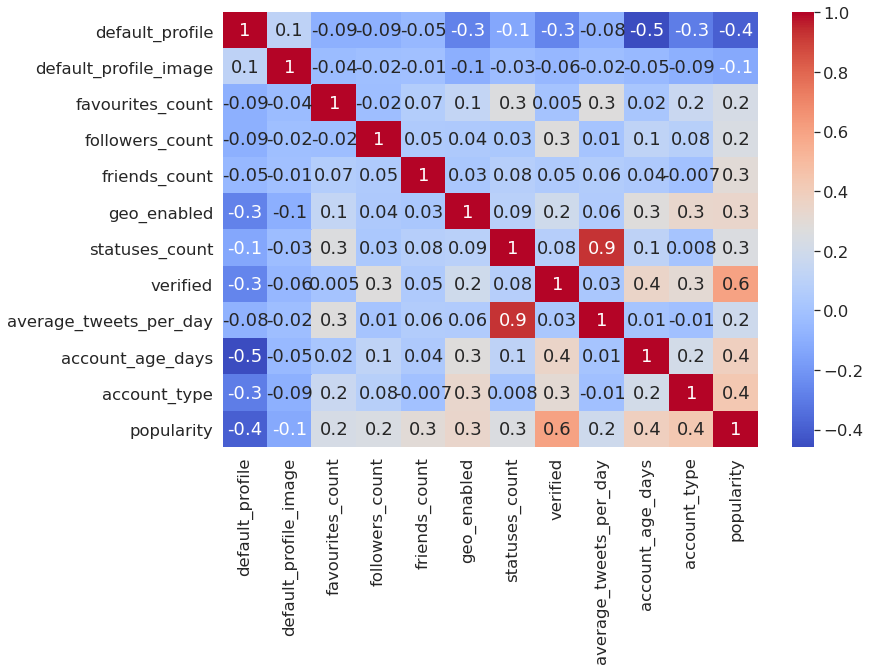

In [21]:
# Compute correlation among the features and the response variable
corr: pd.DataFrame = twitter_accounts_df_num.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values,
            annot = True, fmt='.1g', cmap= 'coolwarm')